In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("/Users/HP/OneDrive/Documents/NIGERIA HOUSE DATA/nigeria_houses_data.csv")
#using 24,000 for training. the remainant will be used as unseen data for accuracy check
data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0


In [3]:
df=data.head(24000)
df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1e-5)
df['bath_toilet_ratio'] = df['bathrooms'] / (df['toilets'] + 1e-5)
df['room_total'] = df['bedrooms'] + df['bathrooms'] + df['toilets']
df['parking_per_room'] = df['parking_space'] / (df['room_total'] + 1e-5)
df

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\45498654.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bed_bath_ratio'] = df['bedrooms'] / (df['bathrooms'] + 1e-5)
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\45498654.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bath_toilet_ratio'] = df['bathrooms'] / (df['toilets'] + 1e-5)
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\45498654.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bed_bath_ratio,bath_toilet_ratio,room_total,parking_per_room
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0,1.199998,0.999998,16.0,0.250000
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0,0.799998,0.999998,14.0,0.285714
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0,0.799998,0.999998,14.0,0.285714
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0,0.999998,0.799998,13.0,0.461538
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0,0.999998,0.799998,13.0,0.153846
...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3.0,3.0,4.0,4.0,Detached Bungalow,Lugbe District,Abuja,34000000.0,0.999997,0.749998,10.0,0.400000
23996,5.0,5.0,6.0,5.0,Detached Duplex,Magodo,Lagos,175000000.0,0.999998,0.833332,16.0,0.312500
23997,4.0,5.0,5.0,4.0,Detached Duplex,Ajah,Lagos,85000000.0,0.799998,0.999998,14.0,0.285714
23998,4.0,5.0,5.0,3.0,Terraced Duplexes,Lekki,Lagos,75000000.0,0.799998,0.999998,14.0,0.214286


In [4]:
df.isnull().sum()

bedrooms             0
bathrooms            0
toilets              0
parking_space        0
title                0
town                 0
state                0
price                0
bed_bath_ratio       0
bath_toilet_ratio    0
room_total           0
parking_per_room     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bedrooms           24000 non-null  float64
 1   bathrooms          24000 non-null  float64
 2   toilets            24000 non-null  float64
 3   parking_space      24000 non-null  float64
 4   title              24000 non-null  object 
 5   town               24000 non-null  object 
 6   state              24000 non-null  object 
 7   price              24000 non-null  float64
 8   bed_bath_ratio     24000 non-null  float64
 9   bath_toilet_ratio  24000 non-null  float64
 10  room_total         24000 non-null  float64
 11  parking_per_room   24000 non-null  float64
dtypes: float64(9), object(3)
memory usage: 2.2+ MB


In [6]:
from sklearn.preprocessing import OneHotEncoder

In [7]:
df_encoded = pd.get_dummies(df, columns=['title', 'town', 'state'])
df_combined= df_encoded.astype(int)
print(df_combined)


       bedrooms  bathrooms  toilets  parking_space      price  bed_bath_ratio  \
0             6          5        5              4  450000000               1   
1             4          5        5              4  800000000               0   
2             4          5        5              4  120000000               0   
3             4          4        5              6   40000000               0   
4             4          4        5              2   75000000               0   
...         ...        ...      ...            ...        ...             ...   
23995         3          3        4              4   34000000               0   
23996         5          5        6              5  175000000               0   
23997         4          5        5              4   85000000               0   
23998         4          5        5              3   75000000               0   
23999         6          5        5              4  250000000               1   

       bath_toilet_ratio  r

In [8]:
df_combined['log_price'] = np.log1p(df['price'])  # Use this as your target instead of raw price

In [9]:
df_combined

,bedrooms,bathrooms,toilets,parking_space,price,bed_bath_ratio,bath_toilet_ratio,room_total,parking_per_room,title_Block of Flats,...,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers,log_price
0,6,5,5,4,450000000,1,0,16,0,0,...,0,0,0,0,0,0,0,0,0,19.924758
1,4,5,5,4,800000000,0,0,14,0,0,...,0,0,0,0,0,0,0,0,0,20.500122
2,4,5,5,4,120000000,0,0,14,0,0,...,0,1,0,0,0,0,0,0,0,18.603002
3,4,4,5,6,40000000,0,0,13,0,0,...,0,1,0,0,0,0,0,0,0,17.504390
4,4,4,5,2,75000000,0,0,13,0,0,...,0,1,0,0,0,0,0,0,0,18.132999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,3,3,4,4,34000000,0,0,10,0,0,...,0,0,0,0,0,0,0,0,0,17.341871
23996,5,5,6,5,175000000,0,0,16,0,0,...,0,1,0,0,0,0,0,0,0,18.980297
23997,4,5,5,4,85000000,0,0,14,0,0,...,0,1,0,0,0,0,0,0,0,18.258162
23998,4,5,5,3,75000000,0,0,14,0,0,...,0,1,0,0,0,0,0,0,0,18.132999


In [10]:
x=df_combined.drop(['price', 'log_price'], axis=1)
y=df_combined['log_price']

In [11]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(x,y, shuffle=True,test_size=0.2, random_state=83)

In [12]:
from sklearn.preprocessing import RobustScaler

In [13]:
scaler=RobustScaler()

In [14]:
# Fit on training data, then transform both train and test
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [15]:
import xgboost as xgb

In [16]:
#Creating and training the model
#from sklearn.linear_model import LinearRegression

In [17]:
model = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42
)

In [18]:
#model=LinearRegression()
model.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [19]:
print(model.intercept_)

[18.3481]


In [20]:
predictions = model.predict(x_test_scaled)

In [21]:
from sklearn import metrics
from sklearn.metrics import r2_score

In [22]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('R2 score:', r2_score(y_test, predictions))

MAE: 0.3892565892683808
MSE: 0.3430222342129742
RMSE: 0.5856810003858536
R2 score: 0.6883022714840963


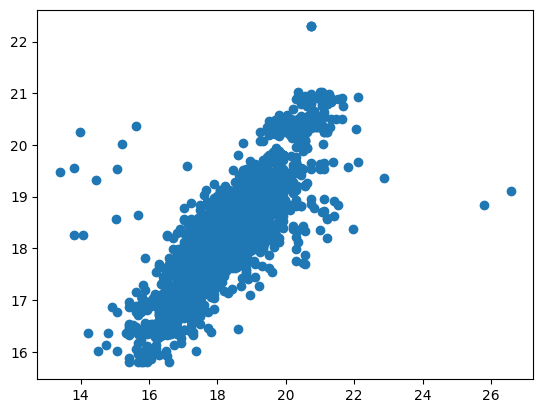

In [23]:
plt.scatter(y_test,predictions)

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\1326397652.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions),bins=50);


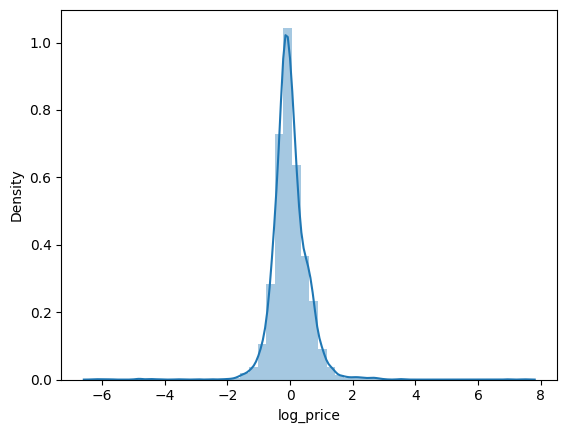

In [24]:
sns.distplot((y_test-predictions),bins=50);

In [25]:
unseen_data=data.iloc[24001:]
unseen_data
unseen_data['bed_bath_ratio'] = unseen_data['bedrooms'] / (unseen_data['bathrooms'] + 1e-5)
unseen_data['bath_toilet_ratio'] = unseen_data['bathrooms'] / (unseen_data['toilets'] + 1e-5)
unseen_data['room_total'] = unseen_data['bedrooms'] + unseen_data['bathrooms'] + unseen_data['toilets']
unseen_data['parking_per_room'] = unseen_data['parking_space'] / (unseen_data['room_total'] + 1e-5)
unseen_data['log_price'] = np.log1p(unseen_data['price'])  # Use this as your target instead of raw price
unseen_data

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\1990991239.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['bed_bath_ratio'] = unseen_data['bedrooms'] / (unseen_data['bathrooms'] + 1e-5)
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\1990991239.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['bath_toilet_ratio'] = unseen_data['bathrooms'] / (unseen_data['toilets'] + 1e-5)
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\1990991239.py:5: SettingWithCopyWarning: 
A value is trying

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bed_bath_ratio,bath_toilet_ratio,room_total,parking_per_room,log_price
24001,6.0,6.0,7.0,4.0,Detached Duplex,Ajah,Lagos,78000000.0,0.999998,0.857142,19.0,0.210526,18.172219
24002,4.0,4.0,5.0,4.0,Detached Duplex,Ajah,Lagos,85000000.0,0.999998,0.799998,13.0,0.307692,18.258162
24003,4.0,4.0,5.0,3.0,Detached Duplex,Lekki,Lagos,55000000.0,0.999998,0.799998,13.0,0.230769,17.822844
24004,4.0,4.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,850000000.0,0.999998,0.799998,13.0,0.307692,20.560747
24005,5.0,5.0,6.0,6.0,Detached Duplex,Lekki,Lagos,70000000.0,0.999998,0.833332,16.0,0.375000,18.064006
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0,0.999995,0.999995,6.0,0.666666,16.523561
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0,0.799998,0.999998,14.0,0.285714,17.034386
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,0.799998,0.999998,14.0,0.285714,18.035018
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,0.749998,0.999998,11.0,0.272727,18.172219


In [26]:
unseen_encoded = pd.get_dummies(unseen_data, columns=['title', 'town', 'state'])
unseen_combined= unseen_encoded.astype(int)
print(unseen_combined)

       bedrooms  bathrooms  toilets  parking_space      price  bed_bath_ratio  \
24001         6          6        7              4   78000000               0   
24002         4          4        5              4   85000000               0   
24003         4          4        5              3   55000000               0   
24004         4          4        5              4  850000000               0   
24005         5          5        6              6   70000000               0   
...         ...        ...      ...            ...        ...             ...   
24321         2          2        2              4   15000000               0   
24322         4          5        5              4   25000000               0   
24323         4          5        5              4   68000000               0   
24324         3          4        4              3   78000000               0   
24325         4          5        5              4   65000000               0   

       bath_toilet_ratio  r

In [27]:
# Assuming 'df_train' is your training DataFrame, and 'unseen_combined' is your new data
# Align the columns of the unseen data with the training data
missing_cols = set(x_train.columns) - set(unseen_combined.columns)
for col in missing_cols:
    unseen_combined[col] = 0  # Add missing columns with 0 values

# Ensure the columns in unseen_combined match the order of columns in df_train
unseen_combined = unseen_combined[x_train.columns] 

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\2536129563.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_combined[col] = 0  # Add missing columns with 0 values
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\2536129563.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  unseen_combined[col] = 0  # Add missing columns with 0 values
C:\Users\HP\AppData\Local\Temp\ipykernel_15884\2536129563.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which ha

In [28]:
unseen_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 24001 to 24325
Columns: 229 entries, bedrooms to state_Rivers
dtypes: int32(89), int64(140)
memory usage: 468.6 KB


In [29]:
unseen_combined

,bedrooms,bathrooms,toilets,parking_space,bed_bath_ratio,bath_toilet_ratio,room_total,parking_per_room,title_Block of Flats,title_Detached Bungalow,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
24001,6,6,7,4,0,0,19,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24002,4,4,5,4,0,0,13,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24003,4,4,5,3,0,0,13,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24004,4,4,5,4,0,0,13,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24005,5,5,6,6,0,0,16,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2,2,2,4,0,0,6,0,1,0,...,0,0,0,0,0,0,0,0,0,0
24322,4,5,5,4,0,0,14,0,1,0,...,0,0,0,0,0,1,0,0,0,0
24323,4,5,5,4,0,0,14,0,0,0,...,0,0,1,0,0,0,0,0,0,0
24324,3,4,4,3,0,0,11,0,1,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
print(unseen_combined.columns)

Index(['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'bed_bath_ratio',
       'bath_toilet_ratio', 'room_total', 'parking_per_room',
       'title_Block of Flats', 'title_Detached Bungalow',
       ...
       'state_Kogi', 'state_Kwara', 'state_Lagos', 'state_Nasarawa',
       'state_Niger', 'state_Ogun', 'state_Osun', 'state_Oyo', 'state_Plateau',
       'state_Rivers'],
      dtype='object', length=229)


In [31]:
unseen_scaled= scaler.fit_transform(unseen_combined)

In [32]:
unseen_pred=model.predict(unseen_scaled)

In [33]:
unseen_pred

array([18.362307, 17.914053, 18.203459, 18.443157, 18.901062, 18.33299 ,
       17.897173, 18.305502, 17.63892 , 17.551167, 18.050018, 19.805   ,
       17.687168, 17.687168, 18.845318, 17.91412 , 18.83777 , 18.46626 ,
       18.13136 , 16.685478, 18.237844, 17.769459, 20.53602 , 18.368828,
       17.672518, 18.187586, 18.83777 , 18.83777 , 17.706764, 18.83777 ,
       18.684015, 19.044964, 18.192505, 18.057667, 18.83777 , 18.48796 ,
       18.239296, 18.777124, 17.996128, 17.586384, 18.83777 , 18.564669,
       18.200605, 17.946388, 17.497705, 18.129196, 18.408484, 20.492575,
       16.425299, 19.287466, 18.83777 , 17.82351 , 18.83777 , 18.33299 ,
       18.485884, 18.368828, 18.375366, 17.362156, 18.33923 , 18.408484,
       16.61364 , 18.589645, 17.914053, 20.358173, 19.880676, 19.499577,
       17.155506, 18.83777 , 18.305502, 18.031557, 18.323961, 18.29417 ,
       16.551317, 18.026411, 18.172987, 17.914053, 17.500818, 17.996128,
       18.560768, 18.835691, 18.83777 , 19.499577, 

In [34]:
# Assuming unseen_pred is a pandas DataFrame

# Convert the numpy array into a pandas Series
pandas_series = pd.Series(unseen_pred)

price_updated_list = pandas_series.tolist()

In [35]:
#Add as a new column
unseen_data['log_price updated'] = price_updated_list

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\2189224872.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['log_price updated'] = price_updated_list


In [36]:
price_updated = round(np.exp(unseen_data['log_price updated']))

In [39]:
unseen_data['price update']= price_updated

C:\Users\HP\AppData\Local\Temp\ipykernel_15884\3391711972.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unseen_data['price update']= price_updated


In [41]:
unseen_data

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price,bed_bath_ratio,bath_toilet_ratio,room_total,parking_per_room,log_price,log_price updated,price update
24001,6.0,6.0,7.0,4.0,Detached Duplex,Ajah,Lagos,78000000.0,0.999998,0.857142,19.0,0.210526,18.172219,18.362307,94329695.0
24002,4.0,4.0,5.0,4.0,Detached Duplex,Ajah,Lagos,85000000.0,0.999998,0.799998,13.0,0.307692,18.258162,17.914053,60252400.0
24003,4.0,4.0,5.0,3.0,Detached Duplex,Lekki,Lagos,55000000.0,0.999998,0.799998,13.0,0.230769,17.822844,18.203459,80475133.0
24004,4.0,4.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,850000000.0,0.999998,0.799998,13.0,0.307692,20.560747,18.443157,102273095.0
24005,5.0,5.0,6.0,6.0,Detached Duplex,Lekki,Lagos,70000000.0,0.999998,0.833332,16.0,0.375000,18.064006,18.901062,161669068.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0,0.999995,0.999995,6.0,0.666666,16.523561,17.482149,39120185.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0,0.799998,0.999998,14.0,0.285714,17.034386,16.968071,23395891.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0,0.799998,0.999998,14.0,0.285714,18.035018,18.332991,91604472.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0,0.749998,0.999998,11.0,0.272727,18.172219,17.865841,57416422.0


In [43]:
y_true= unseen_data['price']
y_pred= unseen_data['price update']

In [45]:
from sklearn.metrics import r2_score

In [47]:
r2 = r2_score(y_true, y_pred)
print("R² Score:", r2)

R² Score: 0.709421899181486
